In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('lyrics.csv')
df = df.dropna()

# # remove punctionation (tag = Z)
df = df[df.Tags != "Z"]
# df = df.set_index("Tags")
# df = df.drop("Z", axis=0) 

In [3]:
df.Lemma.unique()
df.Lemma.value_counts() 

biti       1040
ja          654
ti          537
i           364
da          356
           ... 
budala        1
sličan        1
roman         1
između        1
spajati       1
Name: Lemma, Length: 1459, dtype: int64

In [4]:
df["isVerb"] = df["Tags"].str.find('V') 
verbs = df[df.isVerb >= 0]
verbs

,Artist,Song,Song_ID,Surface,Tags,Lemma,Entity,isVerb
4,Mate Miso Kovac,Ako me ostaviš,Zwn2Yv0K_1,pokuca,Vmr3s,pokucati,O,0
15,Mate Miso Kovac,Ako me ostaviš,Zwn2Yv0K_1,vodi,Vmr3s,voditi,O,0
24,Mate Miso Kovac,Ako me ostaviš,Zwn2Yv0K_1,tješi,Vmr3s,tješiti,O,0
29,Mate Miso Kovac,Ako me ostaviš,Zwn2Yv0K_1,ostaviš,Vmr2s,ostaviti,O,0
32,Mate Miso Kovac,Ako me ostaviš,Zwn2Yv0K_1,poželiš,Vmr2s,poželjeti,O,0
...,...,...,...,...,...,...,...,...
16385,Mate Miso Kovac,Znam da si sama,Zwn2Yv0K_100,ću,Var1s,htjeti,O,0
16390,Mate Miso Kovac,Znam da si sama,Zwn2Yv0K_100,Naći,Vmn,naći,O,0
16391,Mate Miso Kovac,Znam da si sama,Zwn2Yv0K_100,ću,Var1s,htjeti,O,0
16397,Mate Miso Kovac,Znam da si sama,Zwn2Yv0K_100,Doći,Vmn,doći,O,0


In [5]:
verbs["isMain"] = verbs["Tags"].str.find('Vm') 
main_verbs = verbs[verbs.isMain >= 0]
main_verbs


,Artist,Song,Song_ID,Surface,Tags,Lemma,Entity,isVerb,isMain
4,Mate Miso Kovac,Ako me ostaviš,Zwn2Yv0K_1,pokuca,Vmr3s,pokucati,O,0,0
15,Mate Miso Kovac,Ako me ostaviš,Zwn2Yv0K_1,vodi,Vmr3s,voditi,O,0,0
24,Mate Miso Kovac,Ako me ostaviš,Zwn2Yv0K_1,tješi,Vmr3s,tješiti,O,0,0
29,Mate Miso Kovac,Ako me ostaviš,Zwn2Yv0K_1,ostaviš,Vmr2s,ostaviti,O,0,0
32,Mate Miso Kovac,Ako me ostaviš,Zwn2Yv0K_1,poželiš,Vmr2s,poželjeti,O,0,0
...,...,...,...,...,...,...,...,...,...
16377,Mate Miso Kovac,Znam da si sama,Zwn2Yv0K_100,plači,Vmr3s,plakati,O,0,0
16383,Mate Miso Kovac,Znam da si sama,Zwn2Yv0K_100,doći,Vmn,doći,O,0,0
16384,Mate Miso Kovac,Znam da si sama,Zwn2Yv0K_100,Ljubit,Vmn,ljubiti,O,0,0
16390,Mate Miso Kovac,Znam da si sama,Zwn2Yv0K_100,Naći,Vmn,naći,O,0,0


In [6]:
sd = main_verbs.Lemma.value_counts()

In [7]:
sd = pd.DataFrame(sd)
sd = sd[sd.Lemma > 30]

<BarContainer object of 16 artists>

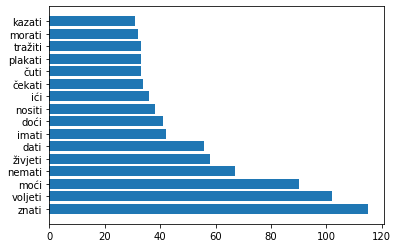

In [8]:
names = sd.index
values = sd["Lemma"]


plt.barh(names, values)


In [11]:
sd = pd.DataFrame(sd)
sd

,Lemma
znati,115
voljeti,102
moći,90
nemati,67
živjeti,58
...,...
prodati,1
otkriti,1
natopiti,1
širiti,1


In [12]:
sd = sd[sd.Lemma > 20]

In [9]:
import pymongo


In [10]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
print(myclient.list_database_names())

['admin', 'config', 'db_name', 'local']


In [11]:
mydb = myclient["db_name"]
print(mydb.list_collection_names())

['verbs', 'artists']


In [12]:
artists_col = mydb["artists"]

for artist in artists_col.find({}, {"_id": 0, "name": 1}):
    print(artist)

{'name': 'Jelena Rozga'}
{'name': 'Severina'}
{'name': 'Oliver Dragojević'}
{'name': 'Mate Mišo Kovač'}


In [13]:
myquery = { "name": { "$regex": "O" } }

mydoc = artists_col.find(myquery)

for artist in mydoc:
    print(artist)

{'_id': ObjectId('5f351c21fb57460e285e4bca'), 'name': 'Oliver Dragojević', 'image': 'https://yt3.ggpht.com/a-/AAuE7mDa2Vfv0sQfgX1hvWFvsd2E1aV_xrtTyod9Ig=s240-mo-c-c0xffffffff-rj-k-no', 'nouns': [{'_id': ObjectId('5f351c21fb57460e285e4bcb'), 'word': 'Poljubac', 'repeats': 90}, {'_id': ObjectId('5f351c21fb57460e285e4bcc'), 'word': 'Poljubac', 'repeats': 90}, {'_id': ObjectId('5f351c21fb57460e285e4bcd'), 'word': 'Poljubac', 'repeats': 90}, {'_id': ObjectId('5f351c21fb57460e285e4bce'), 'word': 'Poljubac', 'repeats': 90}, {'_id': ObjectId('5f351c21fb57460e285e4bcf'), 'word': 'Poljubac', 'repeats': 90}], 'verbs': [{'_id': ObjectId('5f351c21fb57460e285e4bd0'), 'word': 'Poljubiti', 'repeats': 90}, {'_id': ObjectId('5f351c21fb57460e285e4bd1'), 'word': 'Poljubac', 'repeats': 90}, {'_id': ObjectId('5f351c21fb57460e285e4bd2'), 'word': 'Poljubac', 'repeats': 90}, {'_id': ObjectId('5f351c21fb57460e285e4bd3'), 'word': 'Poljubac', 'repeats': 90}, {'_id': ObjectId('5f351c21fb57460e285e4bd4'), 'word': '

In [50]:
myquery = {"name": "Oliver Dragojević"}
newvalues = {"$set": {"image": "https://yt3.ggpht.com/a-/AAuE7mDa2Vfv0sQfgX1hvWFvsd2E1aV_xrtTyod9Ig=s240-mo-c-c0xffffffff-rj-k-no"}}

artists_col.update_one(myquery, newvalues)

print(artists_col.find_one({"name": "Oliver Dragojević"}))

{'_id': ObjectId('5f34882a8a51c907a0eb497d'), 'name': 'Oliver Dragojević', 'image': 'https://yt3.ggpht.com/a-/AAuE7mDa2Vfv0sQfgX1hvWFvsd2E1aV_xrtTyod9Ig=s240-mo-c-c0xffffffff-rj-k-no', 'nouns': [{'_id': ObjectId('5f34882a8a51c907a0eb497e'), 'word': 'Poljubac', 'repeats': 90}, {'_id': ObjectId('5f34882a8a51c907a0eb497f'), 'word': 'Poljubac', 'repeats': 90}, {'_id': ObjectId('5f34882a8a51c907a0eb4980'), 'word': 'Poljubac', 'repeats': 90}, {'_id': ObjectId('5f34882a8a51c907a0eb4981'), 'word': 'Poljubac', 'repeats': 90}, {'_id': ObjectId('5f34882a8a51c907a0eb4982'), 'word': 'Poljubac', 'repeats': 90}], 'verbs': [{'_id': ObjectId('5f34882a8a51c907a0eb4983'), 'word': 'Poljubiti', 'repeats': 90}, {'_id': ObjectId('5f34882a8a51c907a0eb4984'), 'word': 'Poljubac', 'repeats': 90}, {'_id': ObjectId('5f34882a8a51c907a0eb4985'), 'word': 'Poljubac', 'repeats': 90}, {'_id': ObjectId('5f34882a8a51c907a0eb4986'), 'word': 'Poljubac', 'repeats': 90}, {'_id': ObjectId('5f34882a8a51c907a0eb4987'), 'word': '

In [14]:
sd

,Lemma
znati,115
voljeti,102
moći,90
nemati,67
živjeti,58
dati,56
imati,42
doći,41
nositi,38
ići,36


In [15]:
sd = sd.reset_index()


In [17]:
sd.columns = ["word", "repeats"]
sd

,word,repeats
0,znati,115
1,voljeti,102
2,moći,90
3,nemati,67
4,živjeti,58
5,dati,56
6,imati,42
7,doći,41
8,nositi,38
9,ići,36


In [18]:
import json

result = sd.to_json(orient="records")
parsed = json.loads(result)
# json.dumps(parsed, indent=4) 
parsed

[{'word': 'znati', 'repeats': 115},
 {'word': 'voljeti', 'repeats': 102},
 {'word': 'moći', 'repeats': 90},
 {'word': 'nemati', 'repeats': 67},
 {'word': 'živjeti', 'repeats': 58},
 {'word': 'dati', 'repeats': 56},
 {'word': 'imati', 'repeats': 42},
 {'word': 'doći', 'repeats': 41},
 {'word': 'nositi', 'repeats': 38},
 {'word': 'ići', 'repeats': 36},
 {'word': 'čekati', 'repeats': 34},
 {'word': 'čuti', 'repeats': 33},
 {'word': 'plakati', 'repeats': 33},
 {'word': 'tražiti', 'repeats': 33},
 {'word': 'morati', 'repeats': 32},
 {'word': 'kazati', 'repeats': 31}]

In [20]:
myquery = { "name": { "$regex": "^M" } }
newvalues = {"$set": {"verbs": parsed}}

artists_col.update_one(myquery, newvalues)

print(artists_col.find_one({"name": { "$regex": "^M" }}))

{'_id': ObjectId('5f351c21fb57460e285e4bd5'), 'name': 'Mate Mišo Kovač', 'image': 'https://i.scdn.co/image/ab67616d0000b273a6f5e0154fa751dfc3e81de0', 'nouns': [{'_id': ObjectId('5f351c21fb57460e285e4bd6'), 'word': 'Poljubac', 'repeats': 95}, {'_id': ObjectId('5f351c21fb57460e285e4bd7'), 'word': 'San', 'repeats': 90}, {'_id': ObjectId('5f351c21fb57460e285e4bd8'), 'word': 'Poljubac', 'repeats': 80}, {'_id': ObjectId('5f351c21fb57460e285e4bd9'), 'word': 'Poljubac', 'repeats': 90}, {'_id': ObjectId('5f351c21fb57460e285e4bda'), 'word': 'Poljubac', 'repeats': 90}], 'verbs': [{'word': 'znati', 'repeats': 115}, {'word': 'voljeti', 'repeats': 102}, {'word': 'moći', 'repeats': 90}, {'word': 'nemati', 'repeats': 67}, {'word': 'živjeti', 'repeats': 58}, {'word': 'dati', 'repeats': 56}, {'word': 'imati', 'repeats': 42}, {'word': 'doći', 'repeats': 41}, {'word': 'nositi', 'repeats': 38}, {'word': 'ići', 'repeats': 36}, {'word': 'čekati', 'repeats': 34}, {'word': 'čuti', 'repeats': 33}, {'word': 'pla